![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcREYV9sXfo_8FdHZ4MVHjN_LmXIUNKCvk6BbA&usqp=CAU)

hello alll 

hope your are fine with good health  

so, in this notebook i will try to do all end to end ml .. i mean from EDA(Exploratory Data Analysis) to Deploying the Final Trained Model 

generally the common  path of any end to end ML Project is like 

* Data Collection and Problem Statement
* Exploratory Data Analysis 
* Data Preparation(feature engineering)
* Selecting and Training a few Machine Learning Models
* Cross-Validation and Hyperparameter Tuning
* Deploying the Final Trained Model  

let me try all this in this notebook 

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler


from yellowbrick.target import FeatureCorrelation
from scipy.stats import norm
from scipy import stats

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")
color = sns.color_palette()
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

In [3]:
data = pd.read_csv("data/features_all/data.csv")
data_gen = pd.read_csv('data/features_all/data_by_genres.csv')
data_w_gen = pd.read_csv('data/features_all/data_w_genres.csv')
data_yr = pd.read_csv('data/features_all/data_by_year.csv')
data_ar = pd.read_csv('data/features_all/data_by_artist.csv')
data.head()

acousticness                    artists  danceability  duration_ms  energy  \
0      0.991000            ['Mamie Smith']         0.598       168333   0.224   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852       150200   0.517   
2      0.993000            ['Mamie Smith']         0.647       163827   0.186   
3      0.000173        ['Oscar Velazquez']         0.730       422087   0.798   
4      0.295000                   ['Mixe']         0.704       165224   0.707   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   

   loudness  mode                                               name  \
0   -12.628     0                           Keep A Song In Your Soul   
1    -7.261     0                               I Put A Spell On You   
2   -12.098     1                                       Golfing Papa   
3    -7.311     1  True House Music - Xavier Santos & Carlos Gomi...   
4    -6.036     0                                          Xuniverxe   

   popularity release_date  speechiness    tempo  valence  year  
0          12         1920       0.0936  149.976   0.6340  1920  
1           7   1920-01-05       0.0534   86.889   0.9500  1920  
2           4         1920       0.1740   97.600   0.6890  1920  
3          17   1920-01-01       0.0425  127.997   0.0422  1920  
4           2   1920-10-01       0.0768  122.076   0.2990  1920

In [4]:
data.describe()

acousticness   danceability   duration_ms         energy  \
count  174389.000000  174389.000000  1.743890e+05  174389.000000   
mean        0.499228       0.536758  2.328100e+05       0.482721   
std         0.379936       0.176025  1.483958e+05       0.272685   
min         0.000000       0.000000  4.937000e+03       0.000000   
25%         0.087700       0.414000  1.661330e+05       0.249000   
50%         0.517000       0.548000  2.057870e+05       0.465000   
75%         0.895000       0.669000  2.657200e+05       0.711000   
max         0.996000       0.988000  5.338302e+06       1.000000   

            explicit  instrumentalness            key       liveness  \
count  174389.000000     174389.000000  174389.000000  174389.000000   
mean        0.068135          0.197252       5.205305       0.211123   
std         0.251978          0.334574       3.518292       0.180493   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       2.000000       0.099200   
50%         0.000000          0.000524       5.000000       0.138000   
75%         0.000000          0.252000       8.000000       0.270000   
max         1.000000          1.000000      11.000000       1.000000   

            loudness           mode     popularity    speechiness  \
count  174389.000000  174389.000000  174389.000000  174389.000000   
mean      -11.750865       0.702384      25.693381       0.105729   
std         5.691591       0.457211      21.872740       0.182260   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -14.908000       0.000000       1.000000       0.035200   
50%       -10.836000       1.000000      25.000000       0.045500   
75%        -7.499000       1.000000      42.000000       0.076300   
max         3.855000       1.000000     100.000000       0.971000   

               tempo        valence           year  
count  174389.000000  174389.000000  174389.000000  
mean      117.006500       0.524533    1977.061764  
std        30.254178       0.264477      26.907950  
min         0.000000       0.000000    1920.000000  
25%        93.931000       0.311000    1955.000000  
50%       115.816000       0.536000    1977.000000  
75%       135.011000       0.743000    1999.000000  
max       243.507000       1.000000    2021.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

### firstly lets check for all the alalysis with target  that is   ...  "popularity" .... and before going to the analysis lets check for the Feature Correlation by consibering few features

for this i'm going to use [yellowbrick](https://www.scikit-yb.org/en/latest/index.html) ... 

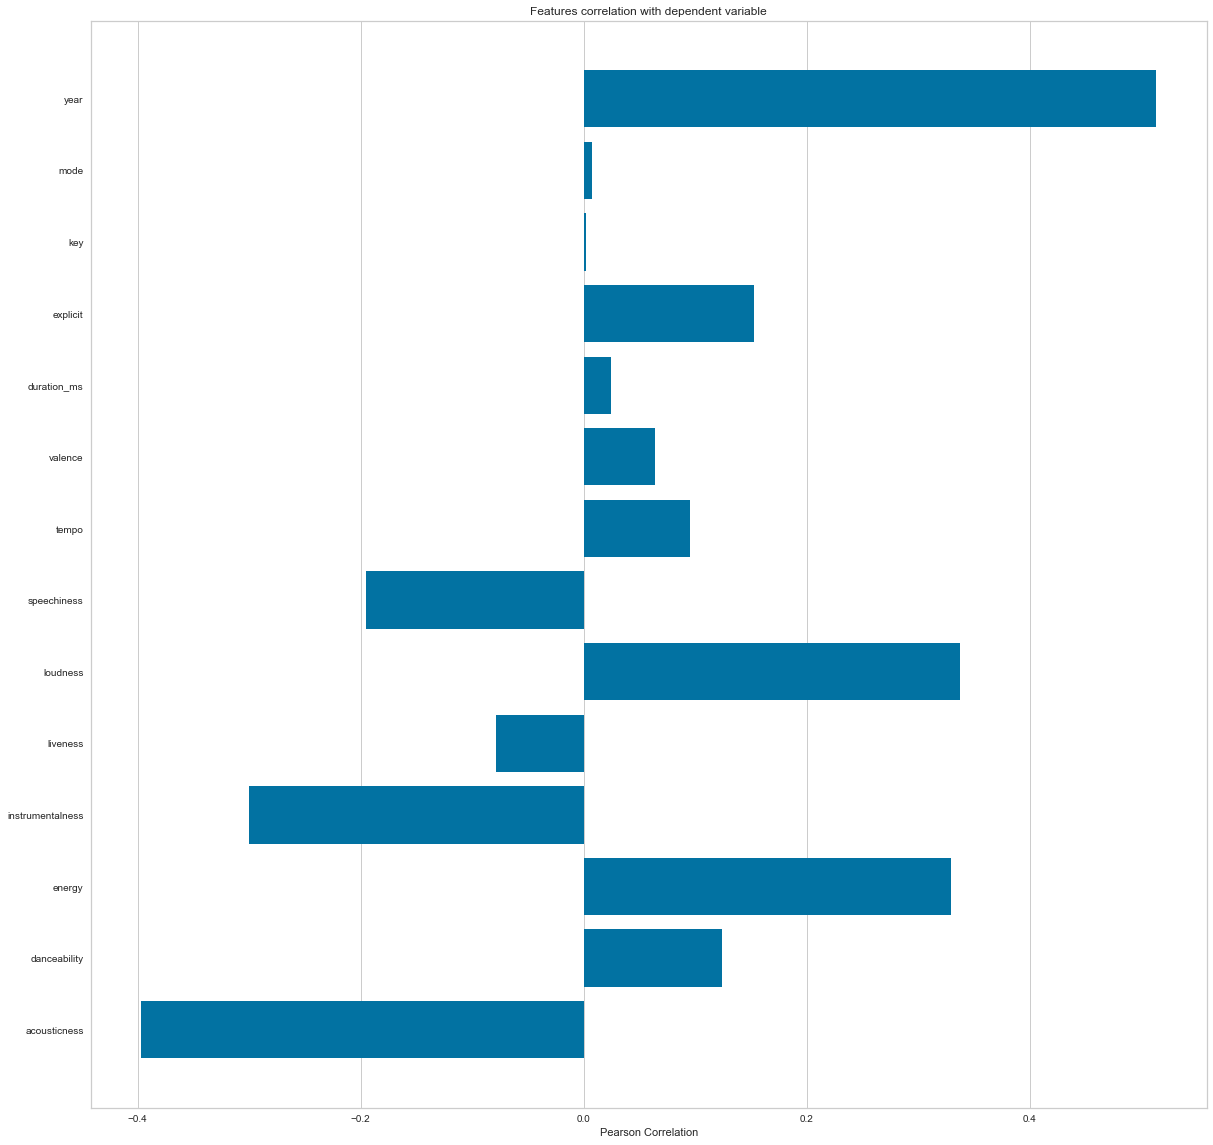

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [6]:

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()       

great .. totally we hvae 9 features with +ve correlation and 5 -ve .... 

In [7]:
total = data.shape[0]
popularity_score_more_than_40 = data[data['popularity'] > 40].shape[0]

probability = (popularity_score_more_than_40/total)*100
print("Probability of song getting more than 40 in popularity :", probability)

Probability of song getting more than 40 in popularity : 27.235089369168925


so popularity ranges from 0 to 100 ... so  Probability of song getting more than 40 is just 38.1 , well getting a song popular is bit difficult task right !!

**before moving to the complete features analysis lets just check for features with more than 0.4 correlation**

displot for the feartures .

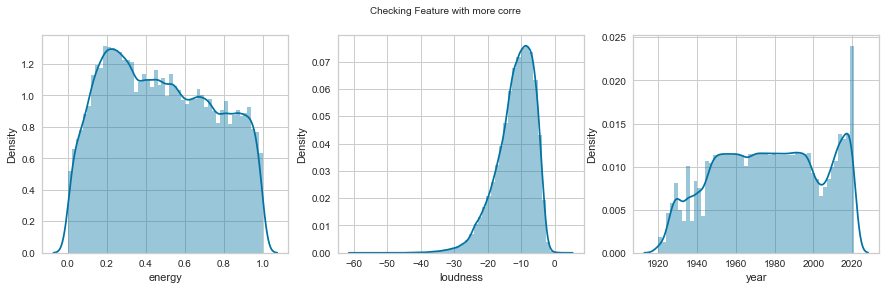

In [8]:
features_o = ['energy','loudness','year']

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
sns.distplot(data['energy'])

plt.subplot(1, 3, 2)
sns.distplot(data['loudness'])

plt.subplot(1, 3, 3)
sns.distplot(data['year'])

plt.suptitle('Checking Feature with more corre ', fontsize = 10)
plt.show()

Probplot for the feartures .

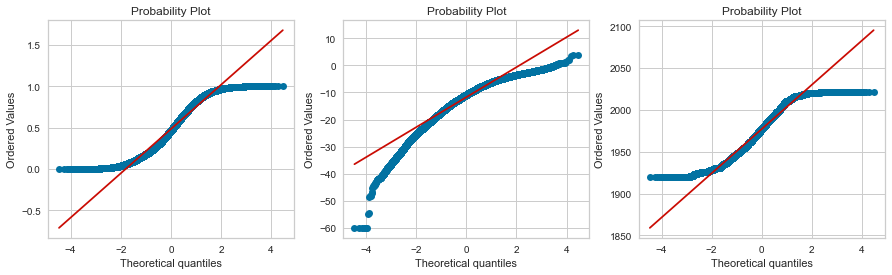

In [9]:
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 3, 1)
res = stats.probplot(data['energy'], plot=plt)

plt.subplot(1, 3, 2)
res = stats.probplot(data['loudness'], plot=plt)

plt.subplot(1, 3, 3)
res = stats.probplot(data['year'], plot=plt)

# Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1

In [10]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(data['popularity'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.17467929]
 [-1.17467929]
 [-1.17467929]
 [-1.17467929]
 [-1.17467929]
 [-1.17467929]
 [-1.17467929]
 [-1.17467929]
 [-1.17467929]
 [-1.17467929]]

outer range (high) of the distribution:
[[3.12291992]
 [3.12291992]
 [3.12291992]
 [3.12291992]
 [3.12291992]
 [3.16863906]
 [3.16863906]
 [3.2143582 ]
 [3.2143582 ]
 [3.39723477]]


# bivariate analysis 

### Loudness VS Pupolarity

> **"Loudness" of the song VS "popularity" by "years" with  Size "key" and for two binary attributes "explict" of the song and "mode" of the song**

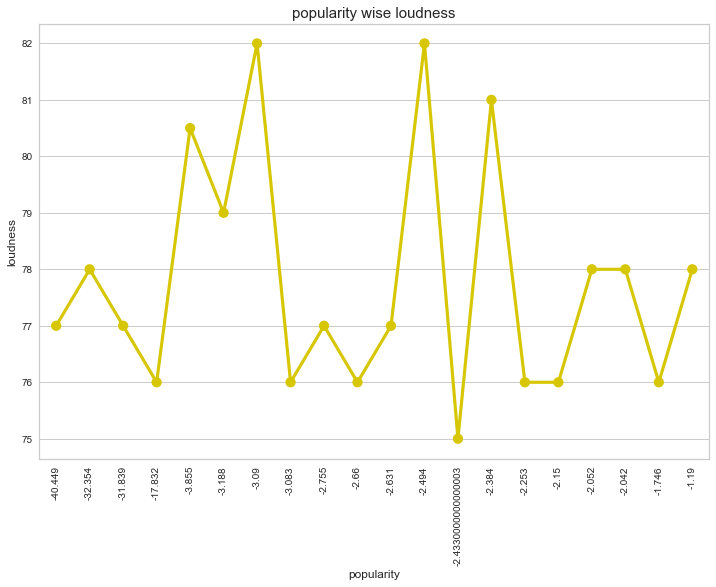

In [11]:
x = data.groupby("loudness")["popularity"].mean().sort_values(ascending=False).head(20).reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x["loudness"].values, x['popularity'].values, color=color[4])
plt.ylabel('loudness', fontsize=12)
plt.xlabel('popularity', fontsize=12)
plt.title("popularity wise loudness", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

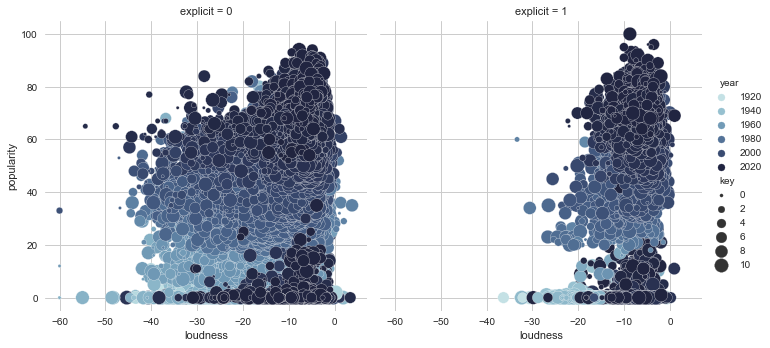

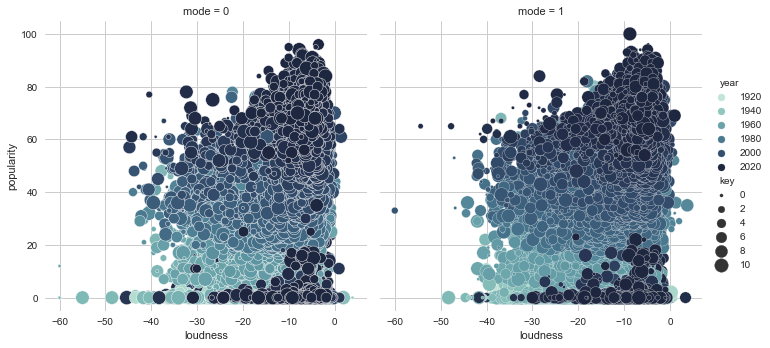

In [12]:

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="loudness", y="popularity",
    hue="year", size="key",col="explicit",
    palette=cmap, sizes=(10, 200)
)

g.despine(left=True, bottom=True)


cmap_ = sns.cubehelix_palette(rot=-.30, as_cmap=True)
g = sns.relplot(
    data=data,
    x="loudness", y="popularity",
    hue="year", size="key",col="mode",
    palette=cmap_, sizes=(10, 200),
)

g.despine(left=True, bottom=True)

lets check out the relation

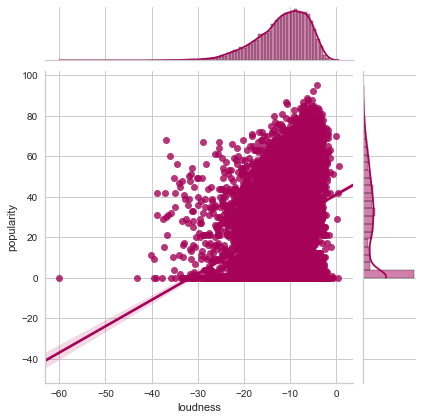

In [13]:
fig1 = sns.jointplot(x="loudness", y="popularity", data=data.sample(10000),
                  kind="reg", truncate=False,
                  color=color[3])

hmm.. good this Loudness have good relation with popularity .. wel loud songs get more popularity ?? 

Audio characteristics like "acousticness","danceability","energy","speechiness","liveness","valence" over year 

In [14]:
data_w_gen['genres'].value_counts()

[]                                                                                                  13563
['movie tunes']                                                                                        68
['show tunes']                                                                                         53
['orchestral performance']                                                                             47
['vocal trance']                                                                                       46
                                                                                                    ...  
['art pop', 'dance pop', 'indie pop', 'metropopolis', 'pop dance', 'pop rock', 'rock']                  1
['hardcore', 'hardcore punk', 'melodic hardcore', 'nyhc', 'punk', 'skate punk', 'straight edge']        1
['alternative r&b', 'dance pop', 'pop', 'pop rap', 'r&b', 'urban contemporary']                         1
['chopped and screwed', 'dirty south rap', 'di

if i assume "[]" as a null place r missing values..... as we can  there are Top 4 genres 

* Movie tunnes 
* show tunnes
* classical piano 
* sleep 

as we all know that based on the genres we the Audio Characteristics will change by key(All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…) used. so now lets check for some  Audio Characteristics like "acousticness", "danceability", "speechiness", "energy" and "valence" ..... as all this valuses are in range of 0 to 1 i hope we can see a clear change..... lets see 

In [15]:
df_movie_tunes = data_w_gen[data_w_gen['genres'] == "['movie tunes']"]
df_show_tunes = data_w_gen[data_w_gen['genres'] == "['show tunes']"]
df_classical_piano = data_w_gen[data_w_gen['genres'] == "['classical piano']"]
df_sleep = data_w_gen[data_w_gen['genres'] == "['sleep']"]

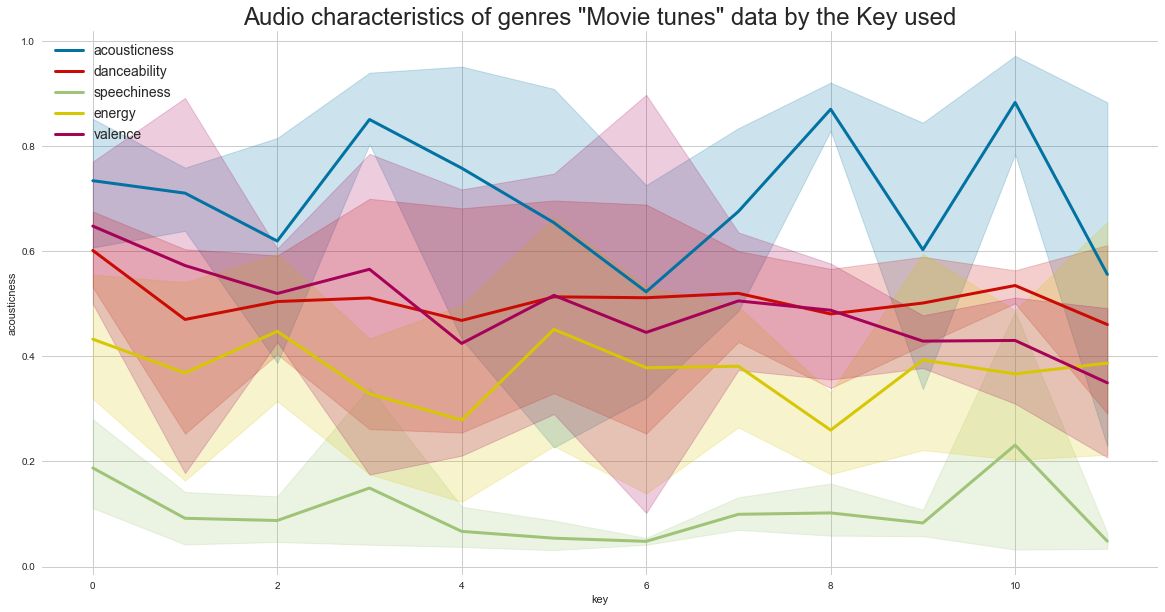

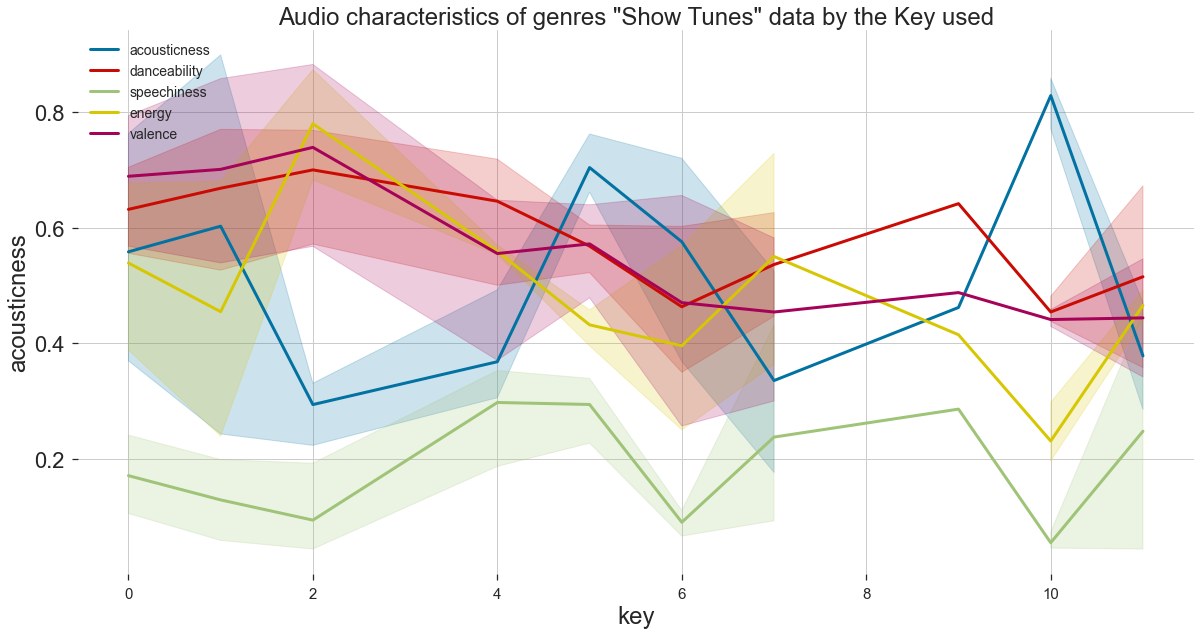

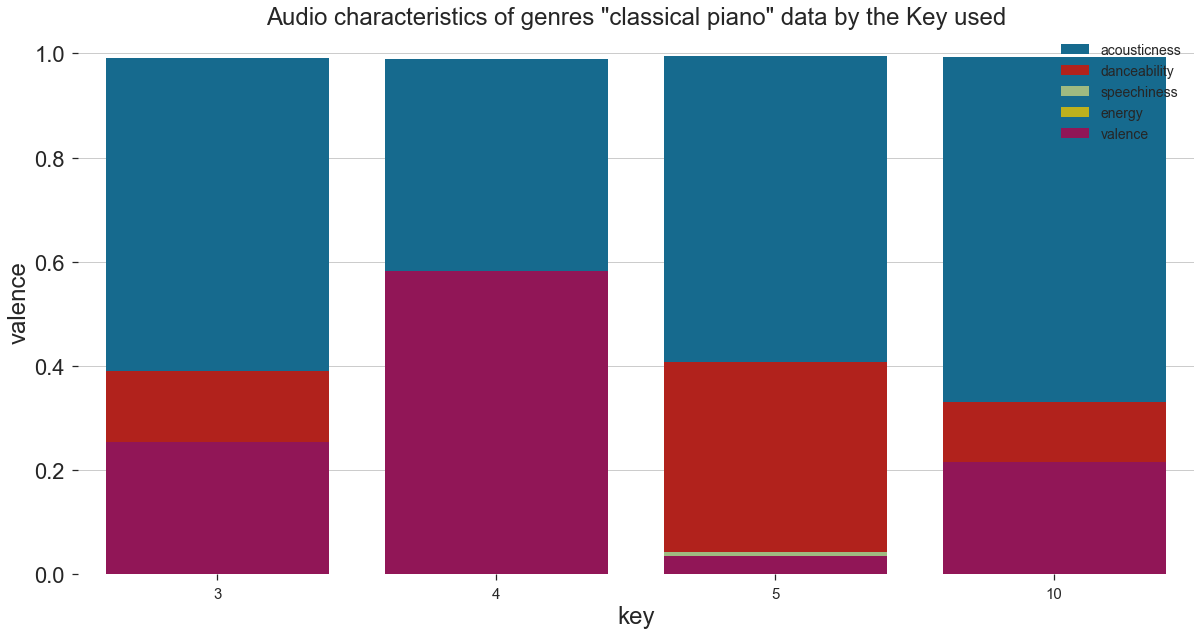

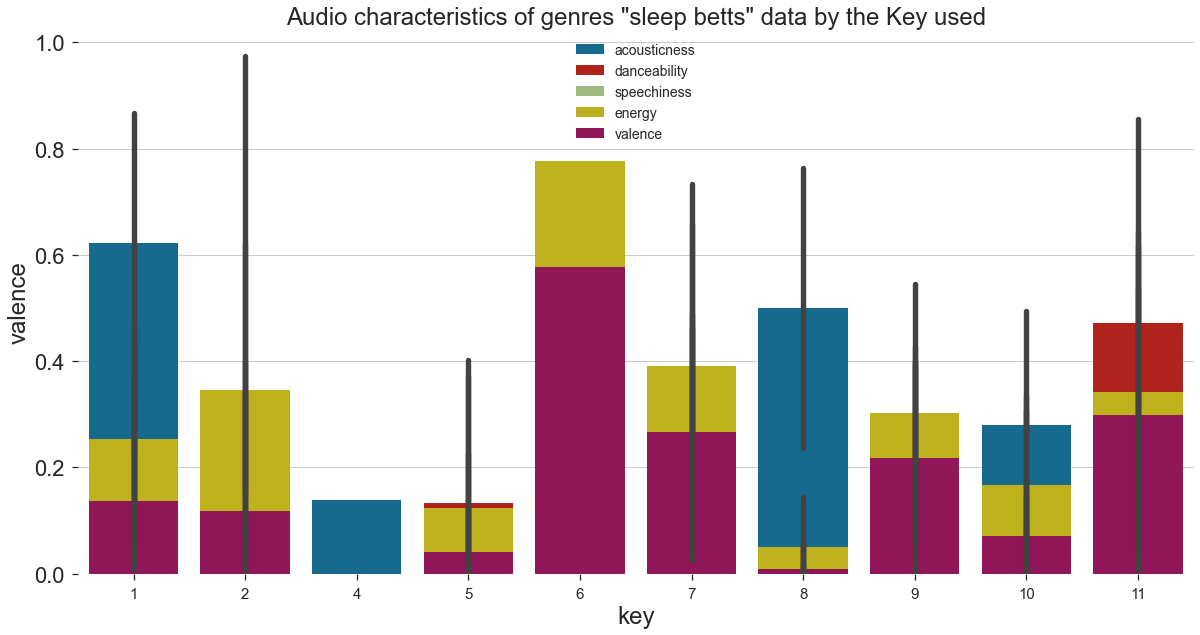

In [16]:
#so lets check all the audio characteristics with top 4 geners 
# first lets start with "movie tunne" which is on TOP 1
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

sns.lineplot(x="key", y="acousticness", data=df_movie_tunes, color="b",label = 'acousticness')
sns.lineplot(x="key", y="danceability", data=df_movie_tunes, color="r",label = 'danceability')
sns.lineplot(x="key", y="speechiness", data=df_movie_tunes, color="g",label = 'speechiness')
sns.lineplot(x="key", y="energy", data=df_movie_tunes, color="y",label = 'energy')
sns.lineplot(x="key", y="valence", data=df_movie_tunes, color="m",label = 'valence')

plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Audio characteristics of genres "Movie tunes" data by the Key used')
ax.legend(fontsize = 14)

# now lets check for top2 gener that is show tunes

fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

sns.lineplot(x="key", y="acousticness", data=df_show_tunes, color="b",label = 'acousticness')
sns.lineplot(x="key", y="danceability", data=df_show_tunes, color="r",label = 'danceability')
sns.lineplot(x="key", y="speechiness", data=df_show_tunes, color="g",label = 'speechiness')
sns.lineplot(x="key", y="energy", data=df_show_tunes, color="y",label = 'energy')
sns.lineplot(x="key", y="valence", data=df_show_tunes, color="m",label = 'valence')

plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Audio characteristics of genres "Show Tunes" data by the Key used')
ax.legend(fontsize = 14)

# now lets check for top3 gener that is classical piano 
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth":3})

sns.barplot(x="key", y="acousticness", data=df_classical_piano, color="b", label = 'acousticness')
sns.barplot(x="key", y="danceability", data=df_classical_piano, color="r", label = 'danceability')
sns.barplot(x="key", y="speechiness", data=df_classical_piano, color="g", label = 'speechiness')
sns.barplot(x="key", y="energy", data=df_classical_piano, color="y", label = 'energy')
sns.barplot(x="key", y="valence", data=df_classical_piano, color="m", label = 'valence')

plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Audio characteristics of genres "classical piano" data by the Key used')
ax.legend(fontsize=14)

# now lets check for top3 gener that is sleep betts 
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth":3})

sns.barplot(x="key", y="acousticness", data=df_sleep, color="b", label = 'acousticness')
sns.barplot(x="key", y="danceability", data=df_sleep, color="r", label = 'danceability')
sns.barplot(x="key", y="speechiness", data=df_sleep, color="g", label = 'speechiness')
sns.barplot(x="key", y="energy", data=df_sleep, color="y", label = 'energy')
sns.barplot(x="key", y="valence", data=df_sleep, color="m", label = 'valence')

plt.rcParams["xtick.labelsize"] = 15

ax.set_title('Audio characteristics of genres "sleep betts" data by the Key used')
ax.legend(fontsize=14)

* as we can see here in most of the genres "acousticness" have more affect 
* "movie tunes" and "show Tunnes" looks like they have their Audio characteristics "valence" as low and "acousticness" as high 
* "classical piano" genres have "acousticness" as most no "speechiness" and "energy"
* generally "sleep betts" should be with low "acousticness" and "danceability" ... the same we can see .... 

In [17]:
data['artists'].value_counts()

['Tadeusz Dolega Mostowicz']                   1281
['Эрнест Хемингуэй']                           1175
['Эрих Мария Ремарк']                          1062
['Francisco Canaro']                            951
['Ignacio Corsini']                             624
                                               ... 
['Snehal Bhatkar']                                1
['Sakal', 'Lata Mangeshkar']                      1
['Snoop Dogg', 'Tha Dogg Pound', 'The Doc']       1
['Yaswa xylophone players']                       1
['Boris Nikolić']                                 1
Name: artists, Length: 36195, dtype: int64

i am very bad at russian i cant understand few names but its ok i have google... .....so  as we can see there are Top 5 artists  

* Эрнест Хемингуэй (Ernest Hemingway ) 
* Francisco Canaro 
* Эрих Мария Ремарк (Erich Maria Remarque) 
* Ignacio Corsini
* Frank Sinatra 

as we all know that artists based on the genres and their creativity they make songs so now lets make a analysis of Audio Characteristics by each artists   lets use few Audio Characteristics like "acousticness", "danceability", "speechiness", "energy" and "valence" ..... as all this valuses are in range of 0 to 1 i hope we can see a clear change..... lets hope so ..

In [18]:
df_top1 = data[data['artists'] == "['Эрнест Хемингуэй']"]
df_top2 = data[data['artists'] == "['Francisco Canaro']"]
df_top3 = data[data['artists'] == "['Эрих Мария Ремарк']"]
df_top4 = data[data['artists'] == "['Ignacio Corsini']"]
df_top5 = data[data['artists'] == "['Frank Sinatra']"]

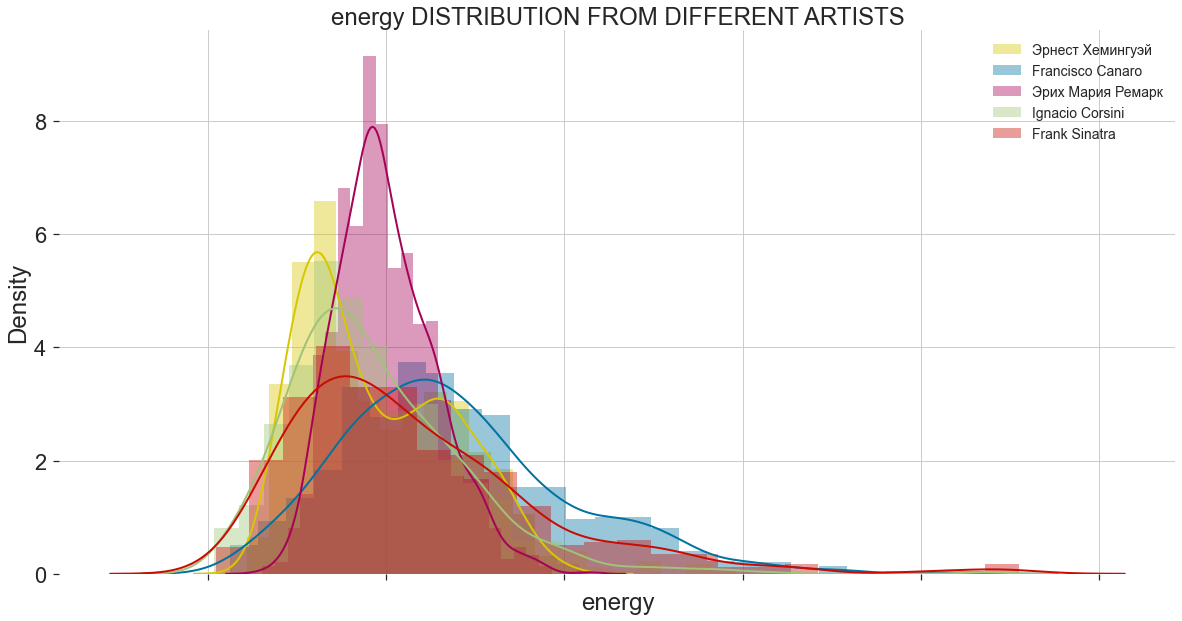

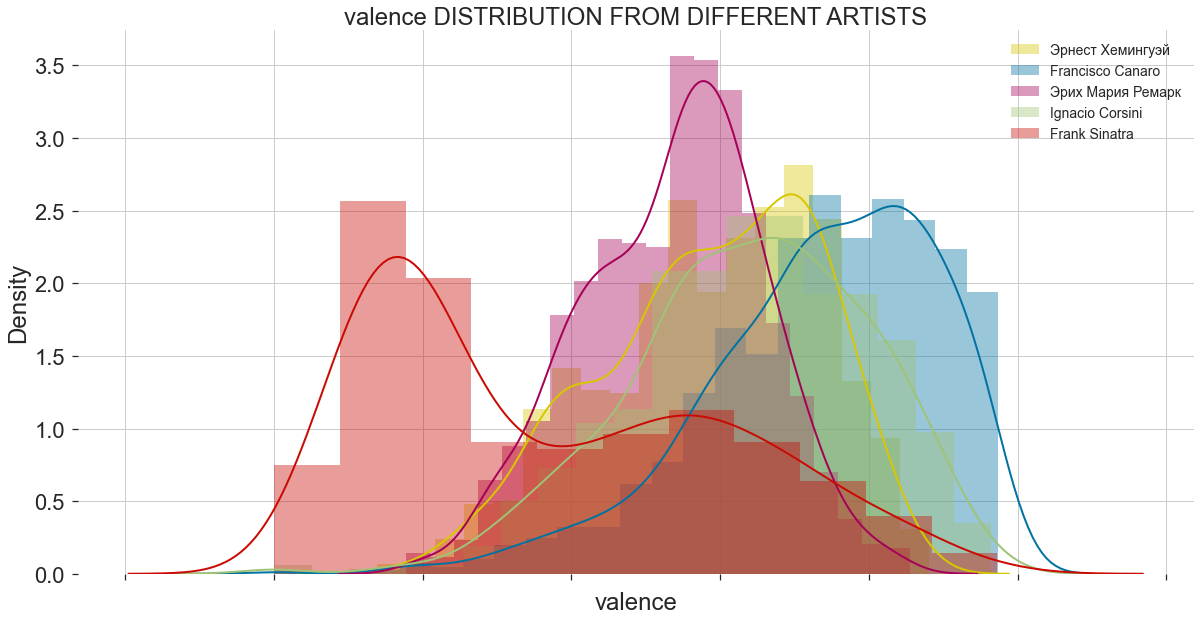

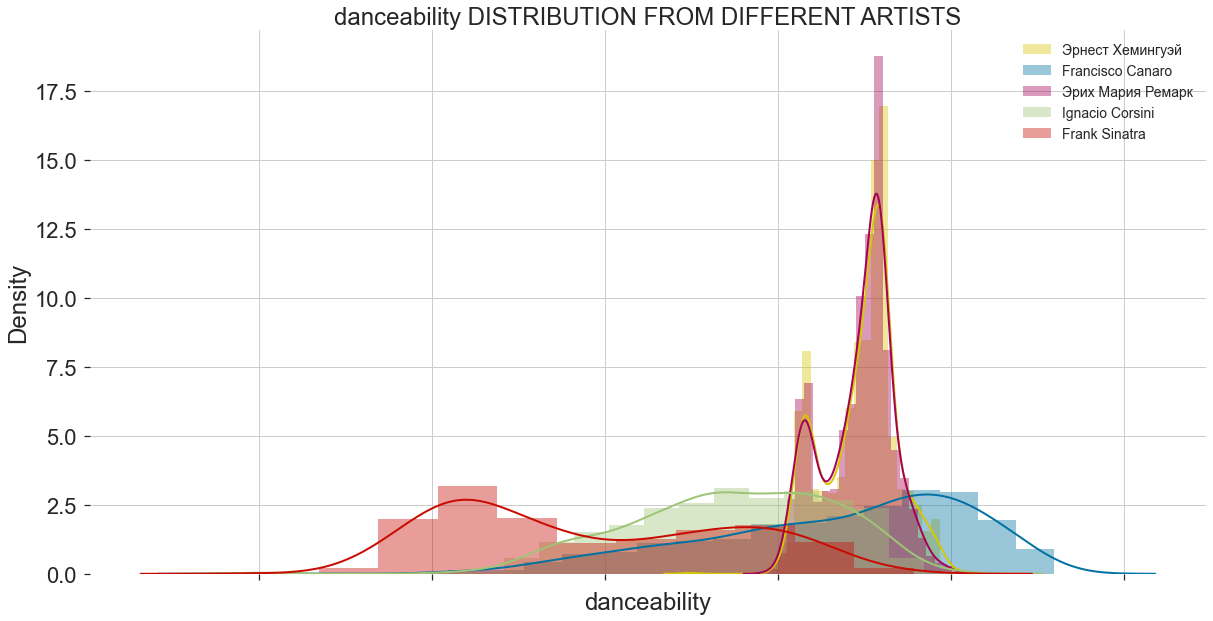

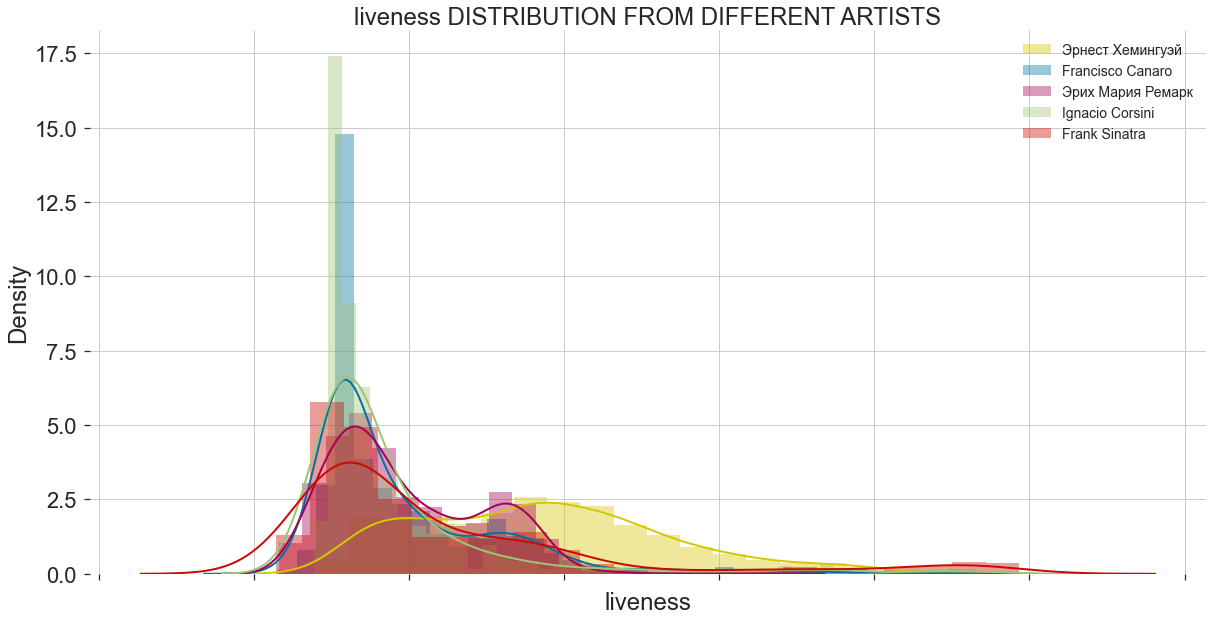

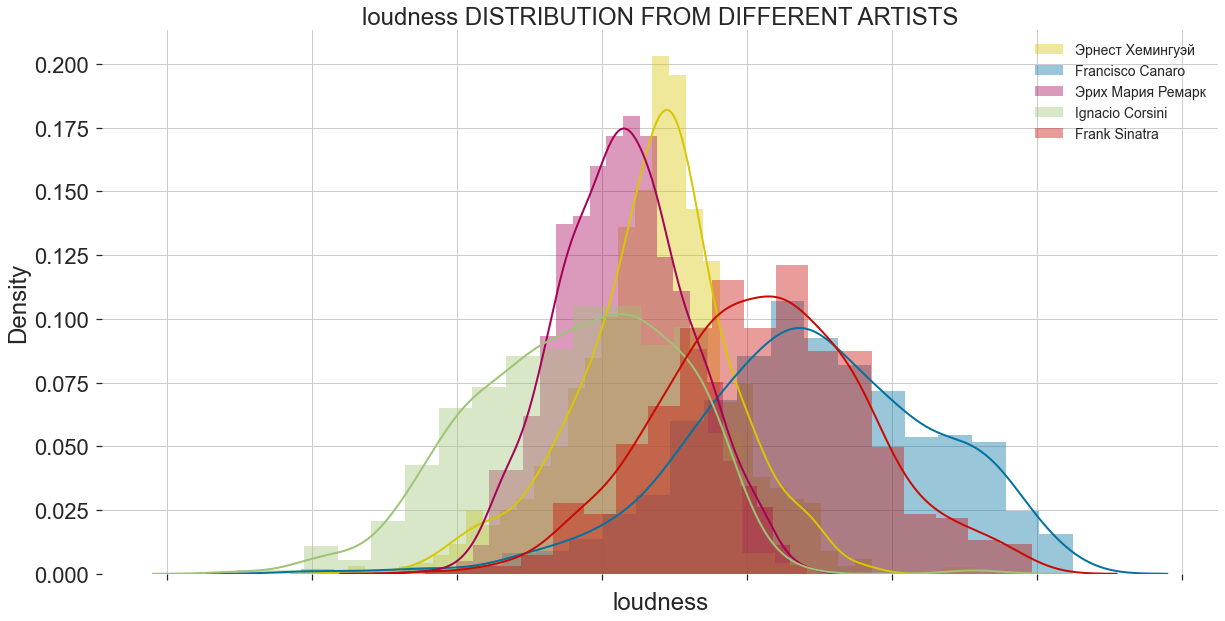

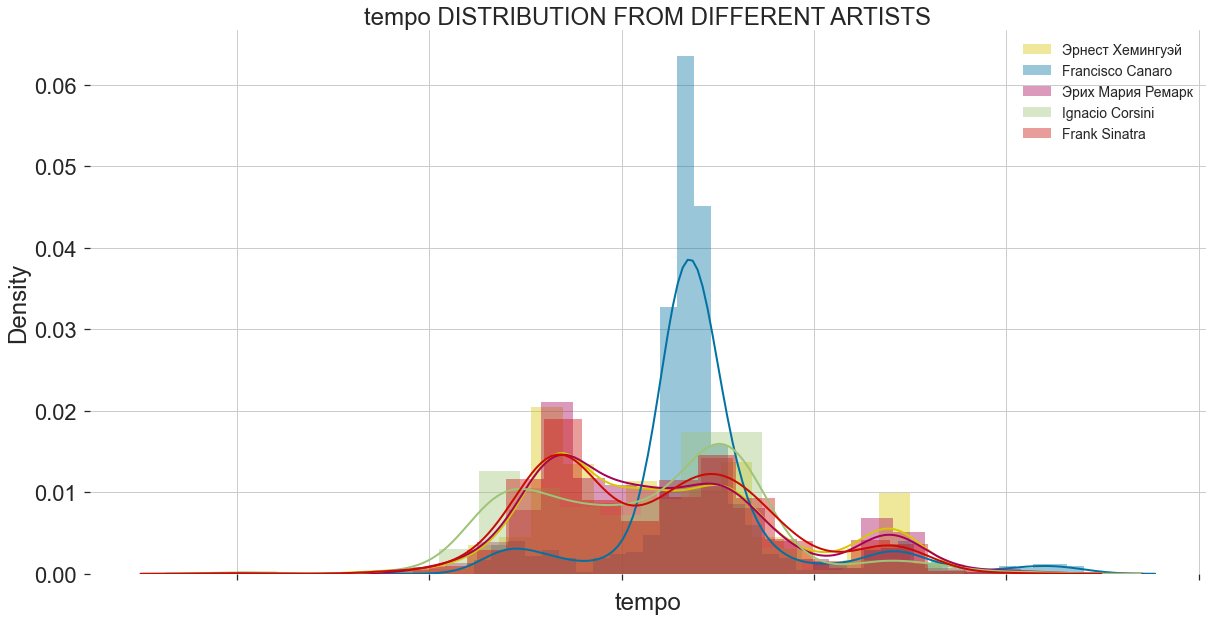

In [19]:

# for energy
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['energy'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['energy'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['energy'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['energy'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['energy'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('energy DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)

# for valence
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['valence'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['valence'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['valence'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['valence'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['valence'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('valence DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)

# danceability
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['danceability'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['danceability'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['danceability'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['danceability'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['danceability'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('danceability DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)

# for liveness
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['liveness'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['liveness'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['liveness'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['liveness'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['liveness'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('liveness DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)

# for loudness
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['loudness'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['loudness'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['loudness'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['loudness'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['loudness'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('loudness DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)

# fro tempo 
fig, ax = plt.subplots(figsize=(20,10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook",font_scale=2, rc={"lines.linewidth": 2})

sns.distplot(df_top1['tempo'], color='y',label="Эрнест Хемингуэй")
sns.distplot(df_top2['tempo'], color='b',label="Francisco Canaro")
sns.distplot(df_top3['tempo'], color='m',label="Эрих Мария Ремарк")
sns.distplot(df_top4['tempo'], color='g',label="Ignacio Corsini")
sns.distplot(df_top5['tempo'], color='r',label="Frank Sinatra")


labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'for all the audio characteristics'

ax.set_xticklabels(ax.get_xticklabels(labels), rotation=30, ha='left')
plt.rcParams["xtick.labelsize"] = 15


ax.set_title('tempo DISTRIBUTION FROM DIFFERENT ARTISTS')
ax.legend(fontsize = 14)


lets maek analysis for the key and the mode with all different Audio Characteristics 

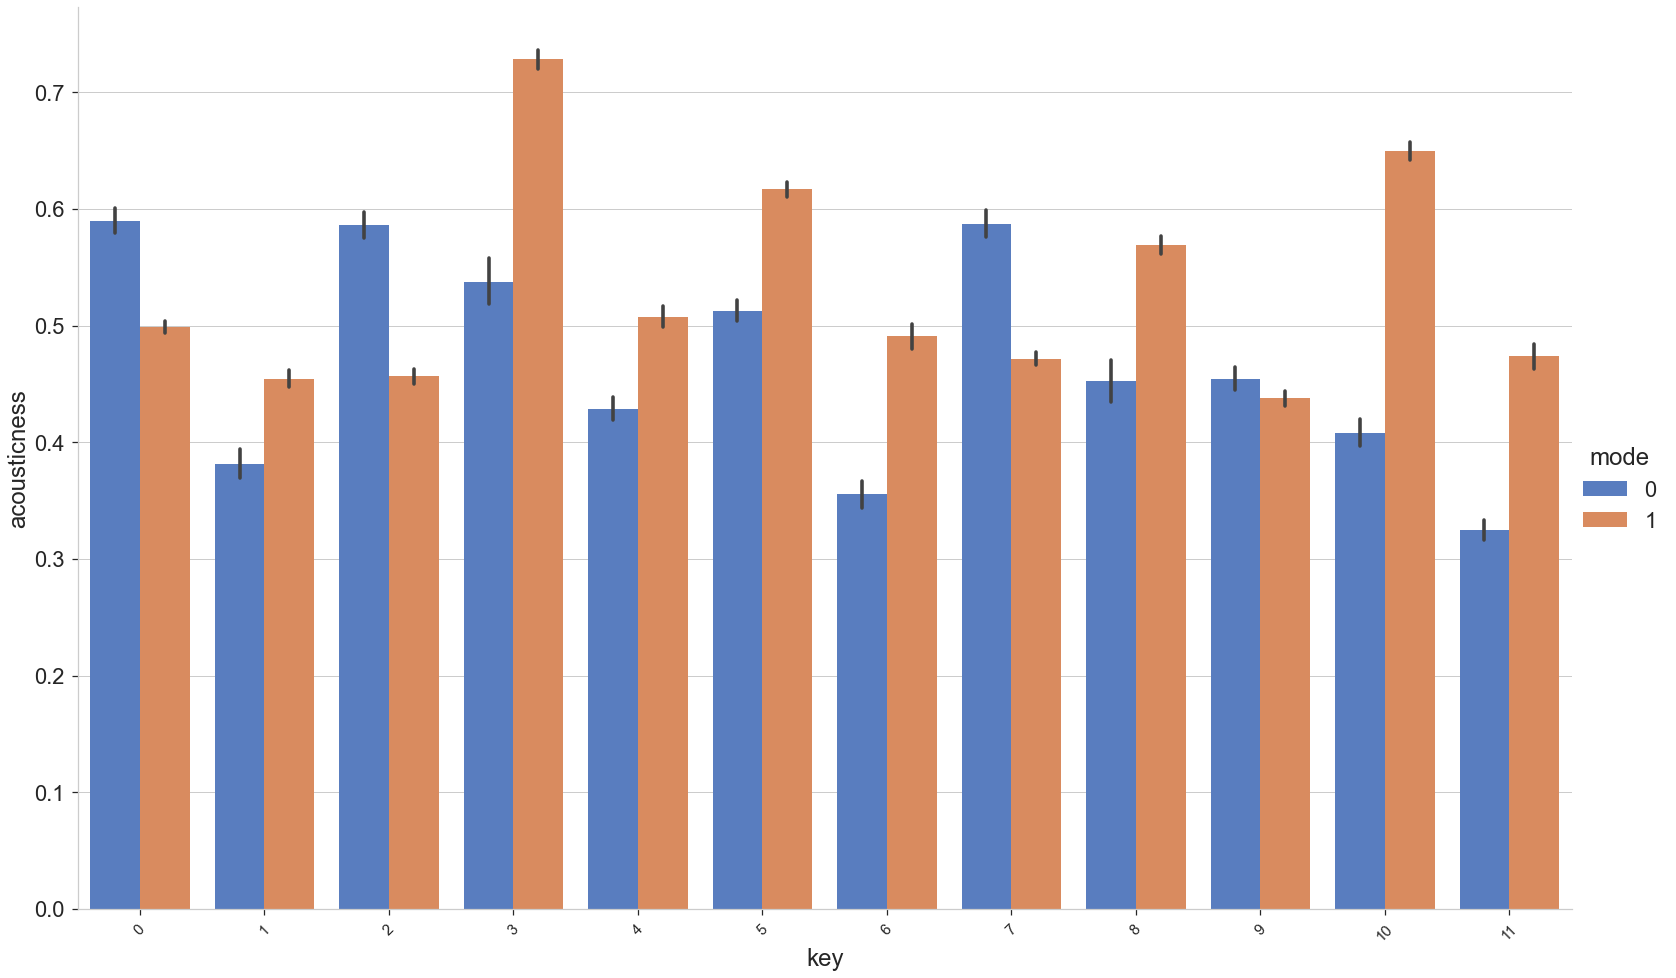

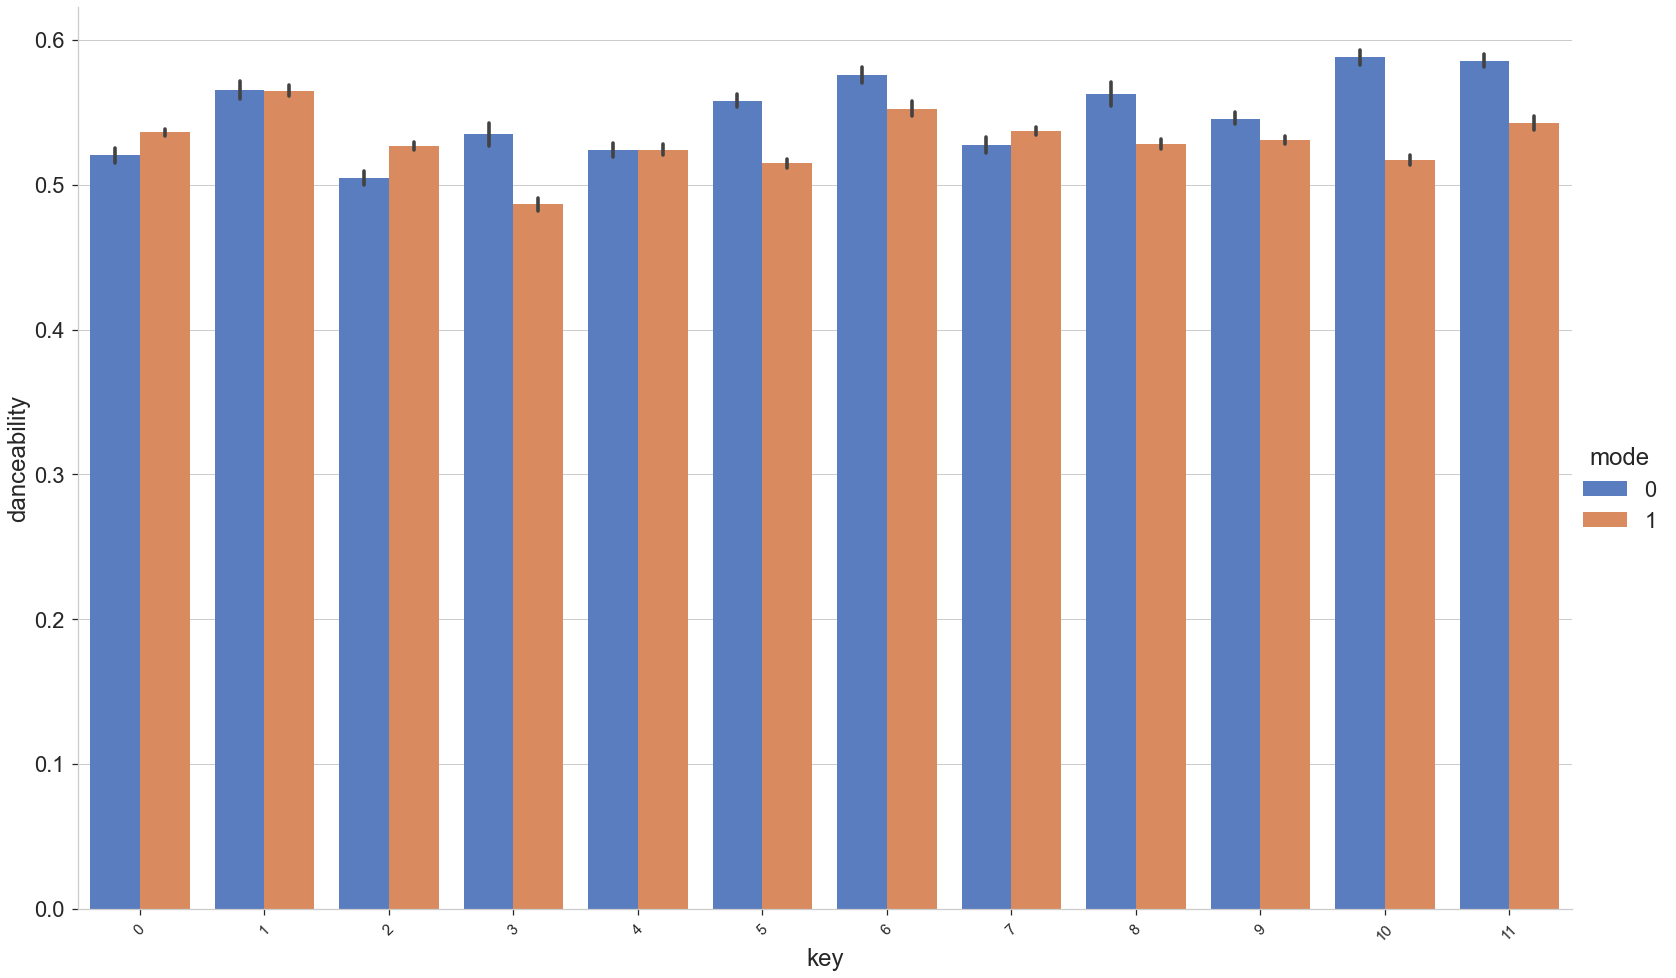

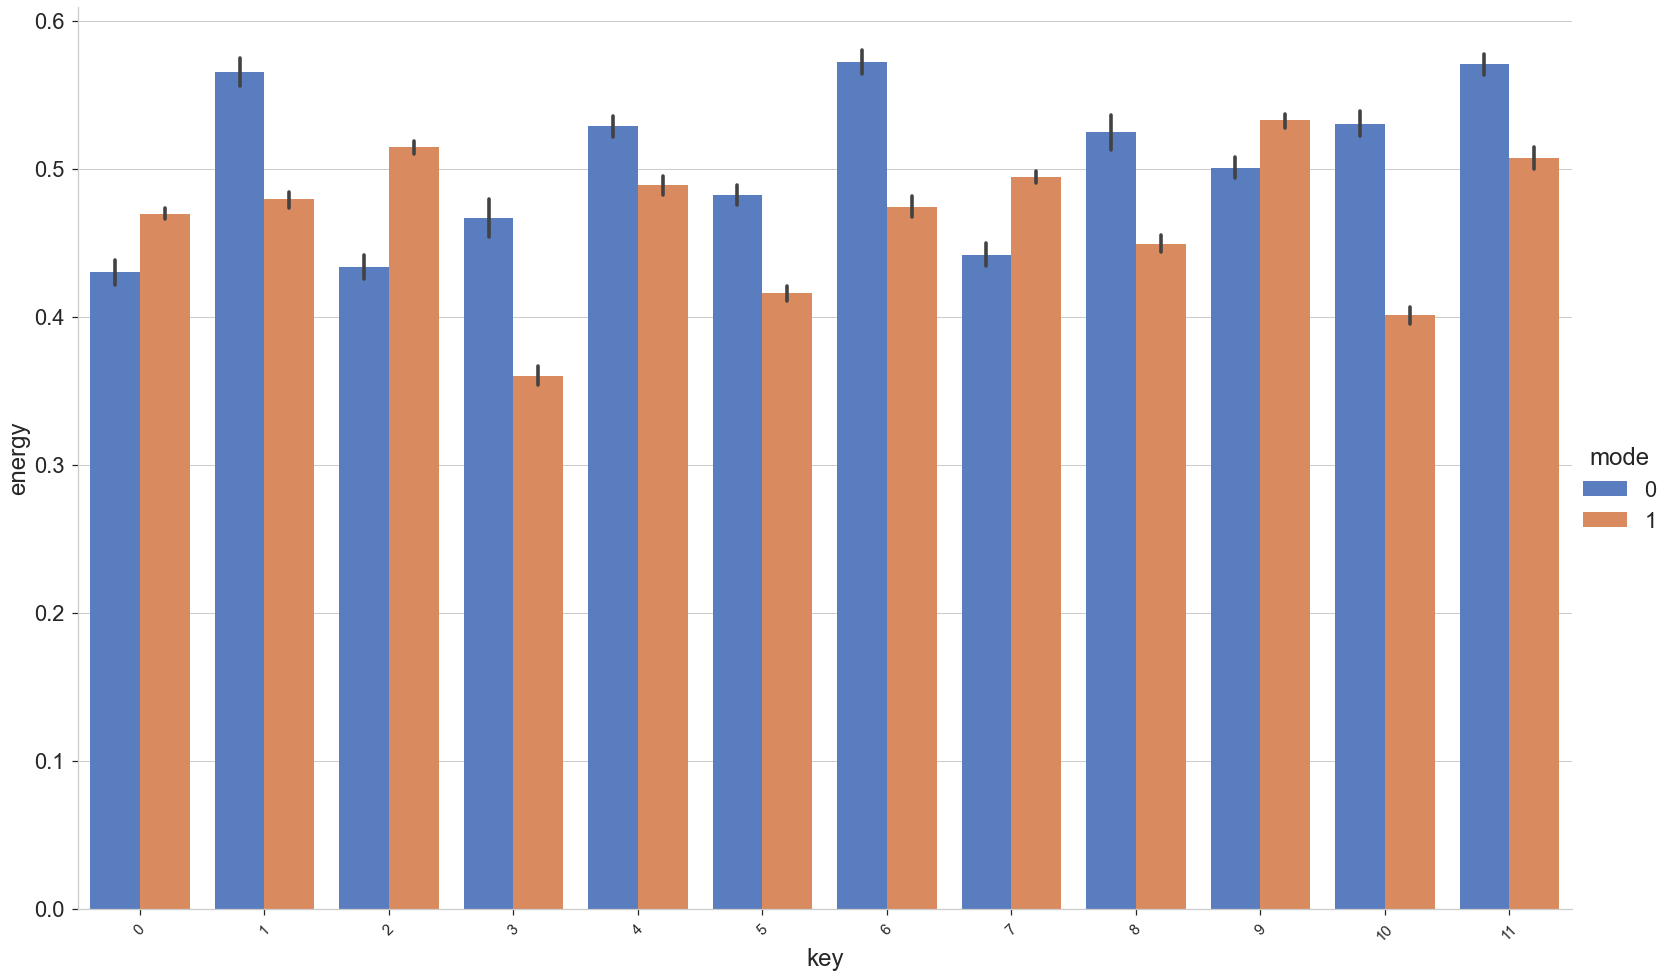

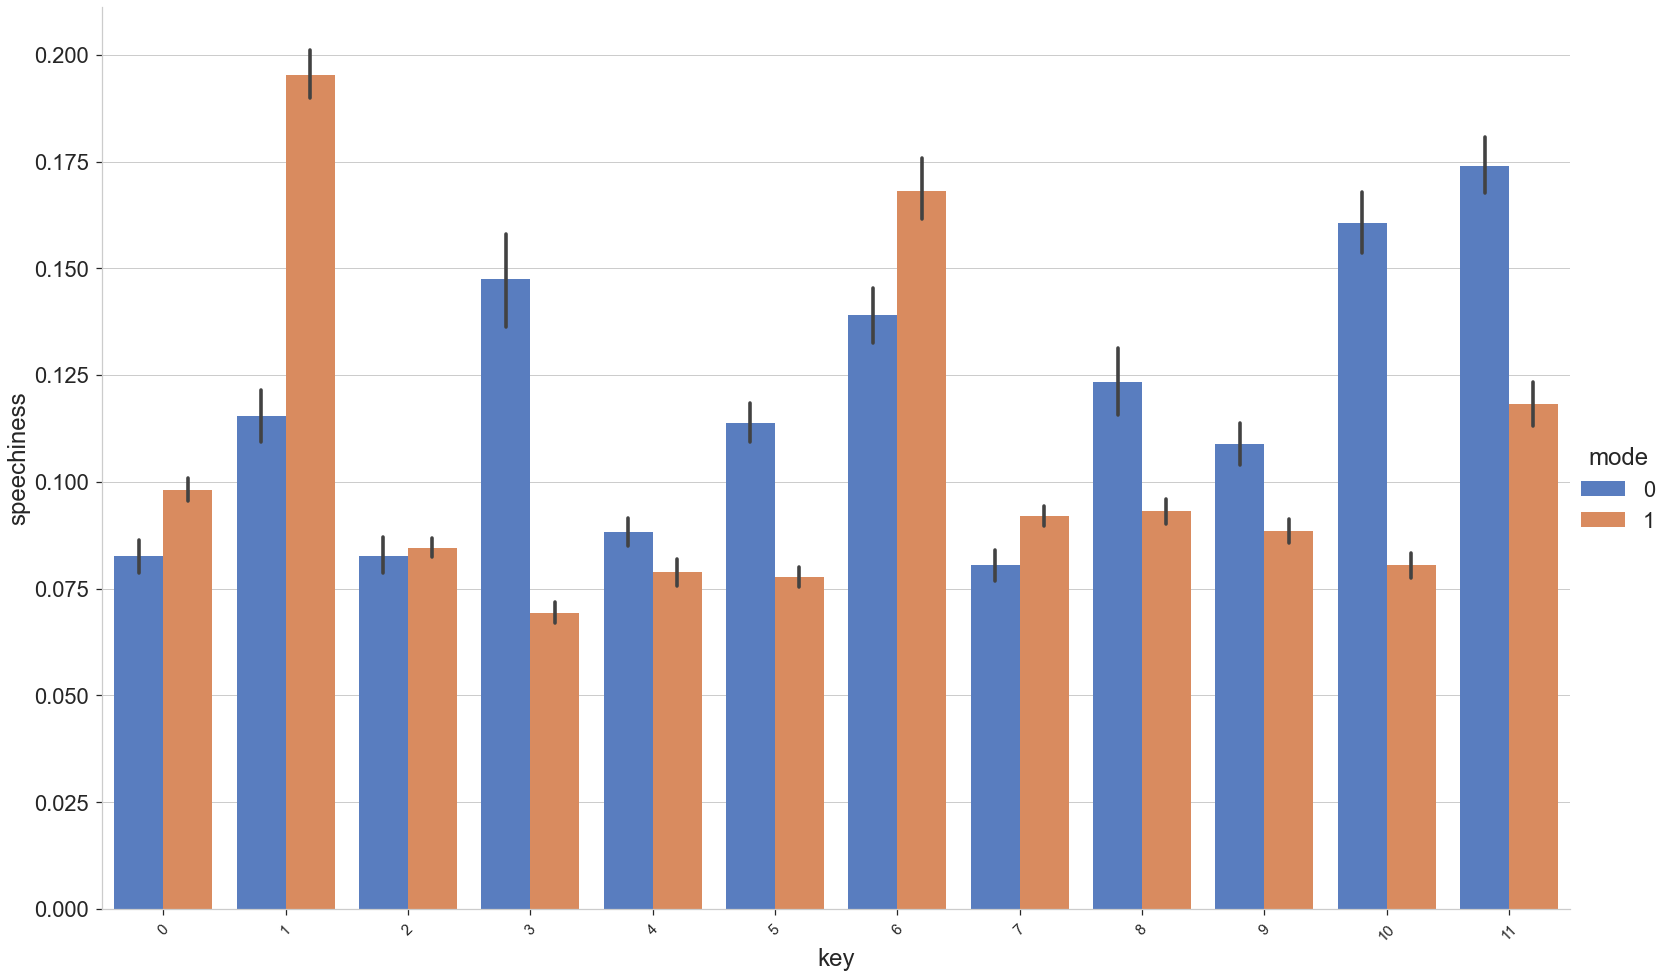

In [20]:
chart = sns.catplot(x="key", y="acousticness", hue="mode", data=data, height=14, aspect=1.6, kind="bar", palette="muted");
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x="key", y="danceability", hue="mode", data=data, height=14, aspect=1.6, kind="bar", palette="muted");
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x="key", y="energy", hue="mode", data=data, height=14, aspect=1.6, kind="bar", palette="muted");
chart.set_xticklabels(rotation=45);

chart = sns.catplot(x="key", y="speechiness", hue="mode", data=data, height=14, aspect=1.6, kind="bar", palette="muted");
chart.set_xticklabels(rotation=45);

lets try seeing in form of Wordcloud for top50 Artist songs in 2019 

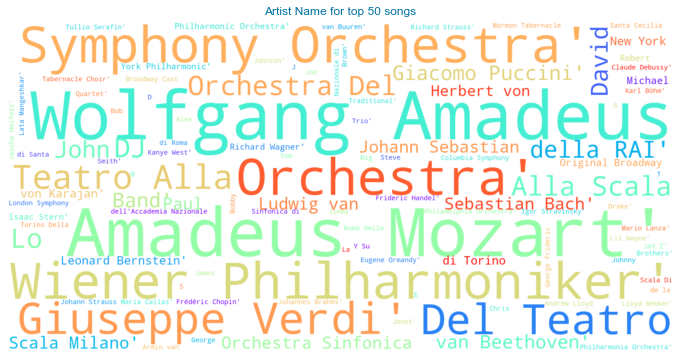

In [24]:
plt.style.use('seaborn')
wrds1 = data["artists"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(scale=5,max_words=1000,colormap="rainbow",background_color="white").generate(" ".join(wrds1))
plt.figure(figsize=(12,18))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Artist Name for top 50 songs ",color='b')
plt.show()

### Liveness VS Pupolarity

> **"liveness" of the song VS "popularity" by "years" with  Size "key" and for two binary attributes "explict" of the song and "mode" of the song**

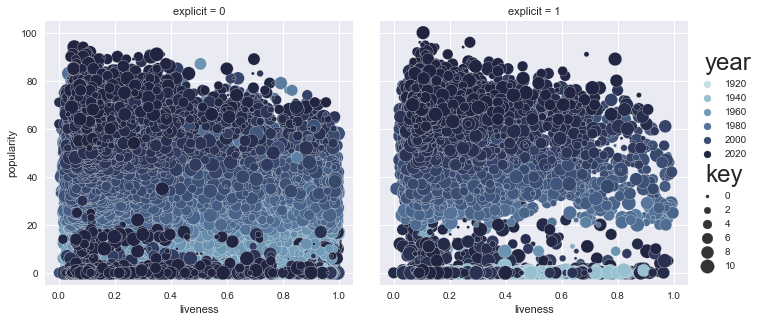

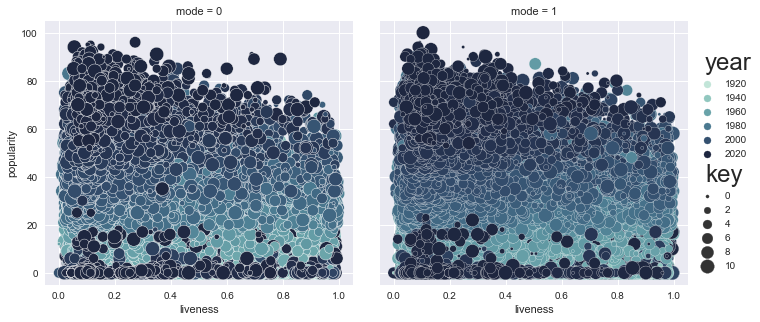

In [25]:

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=data,
    x="liveness", y="popularity",
    hue="year", size="key",col="explicit",
    palette=cmap, sizes=(10, 200),
)

g.despine(left=True, bottom=True)


cmap_ = sns.cubehelix_palette(rot=-.30, as_cmap=True)
g = sns.relplot(
    data=data,
    x="liveness", y="popularity",
    hue="year", size="key",col="mode",
    palette=cmap_, sizes=(10, 200),
)

g.despine(left=True, bottom=True)

[Text(0.5, 1.0, 'loudness with data_genres.csv')]

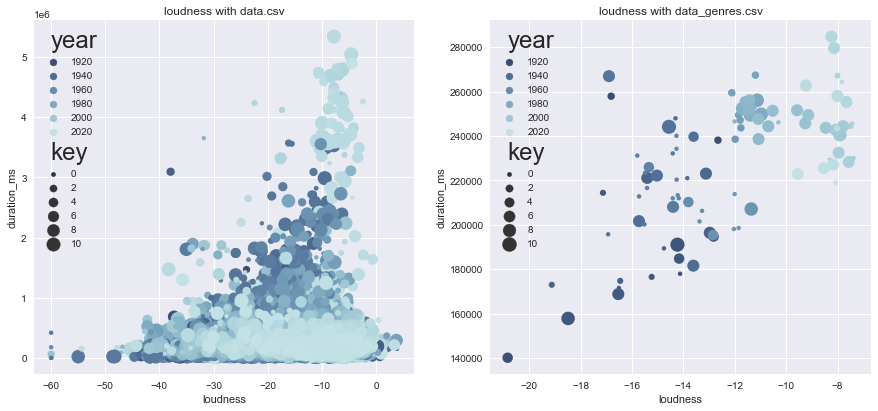

In [26]:
f, ax = plt.subplots(1,2,figsize=(15, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="loudness", y="duration_ms",
                hue="year", size="key",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=data, ax=ax[0]).set(title='loudness with data.csv')
sns.scatterplot(x="loudness", y="duration_ms",
                hue="year", size="key",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=data_yr, ax=ax[1]).set(title='loudness with data_genres.csv')

usually by years and technology the instruments in music had a great change i feel ... 
..
so lets check the change of Audio characteristics over year once 

Text(0.5, 0, 'Year')

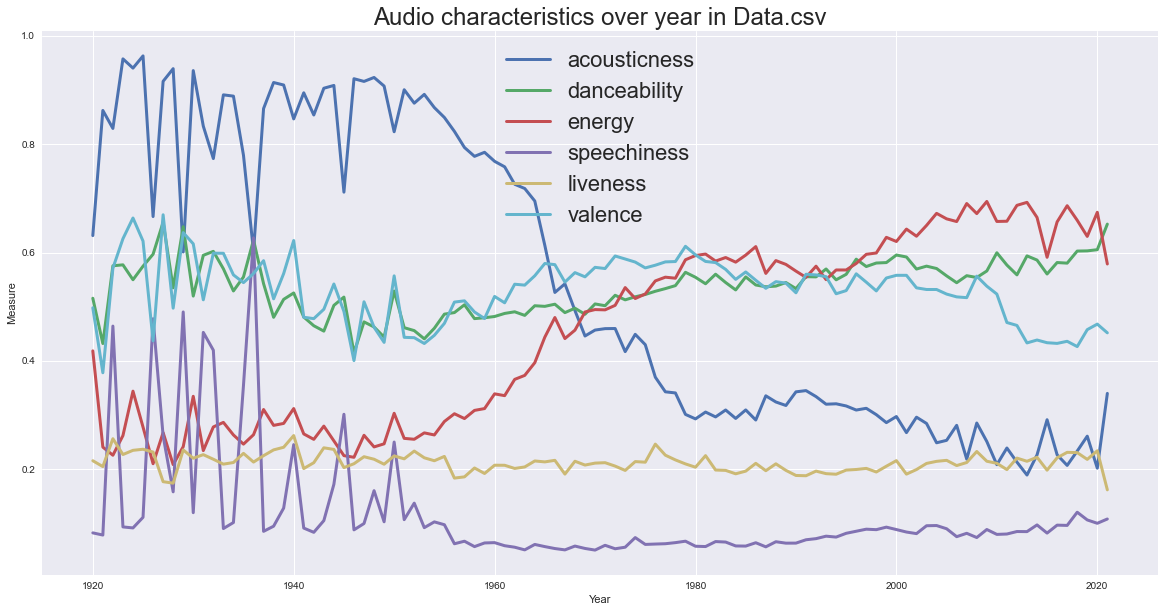

In [27]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year in Data.csv')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

hope you can see the difference 

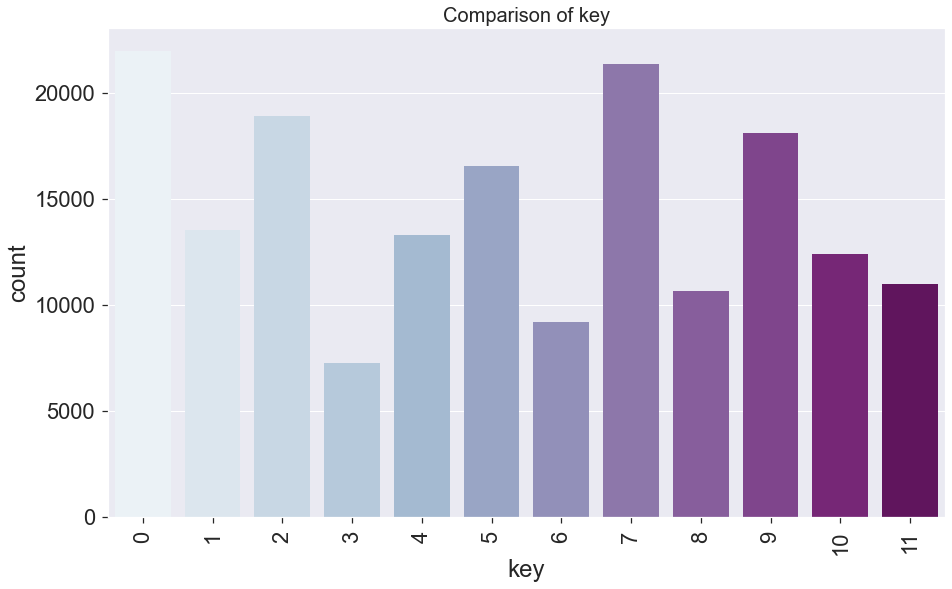

In [28]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['key'], palette = 'BuPu')
plt.title('Comparison of key', fontweight = 30, fontsize = 20)
plt.xlabel('key')
plt.ylabel('count')
plt.xticks(rotation = 90)
plt.show()

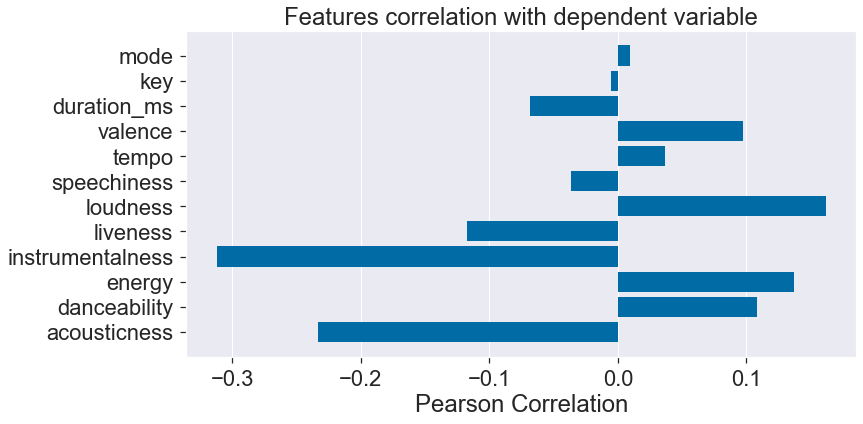

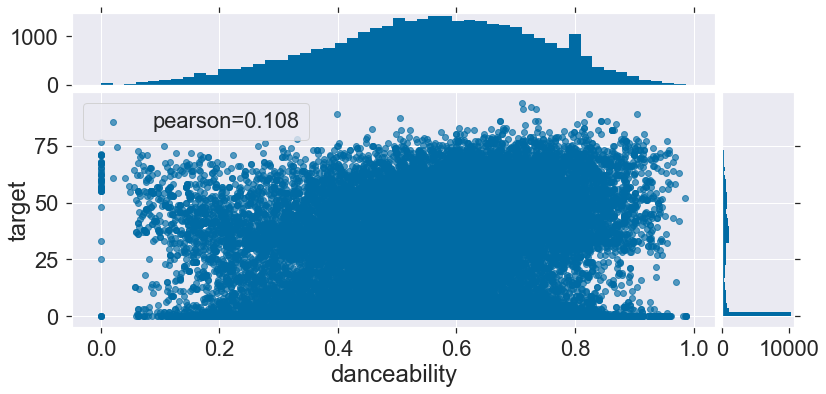

<AxesSubplot:xlabel='danceability', ylabel='target'>

In [29]:
from yellowbrick.features import JointPlotVisualizer


feature_names_art = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','key','mode']

X, y = data_ar[feature_names_art], data_ar['popularity']

features = np.array(feature_names_art)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize'] = (12,6)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()  

# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns="danceability")

visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()  

tempo by artist ... 

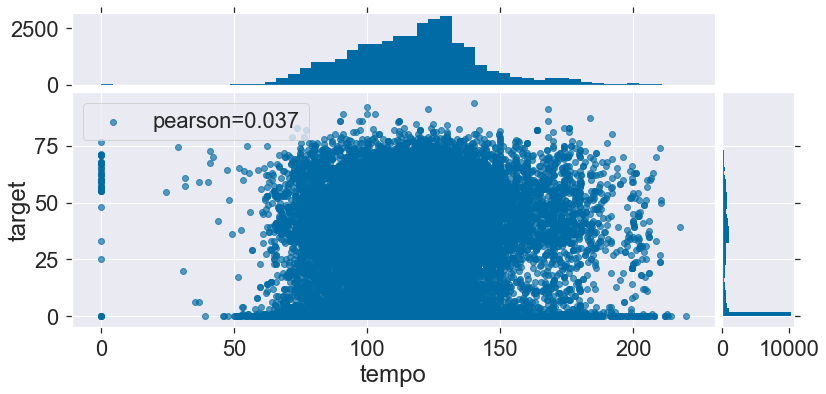

<AxesSubplot:xlabel='tempo', ylabel='target'>

In [30]:
# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns="tempo")

plt.rcParams['figure.figsize'] = (12,6)
visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show() 

loudness by artist ... 

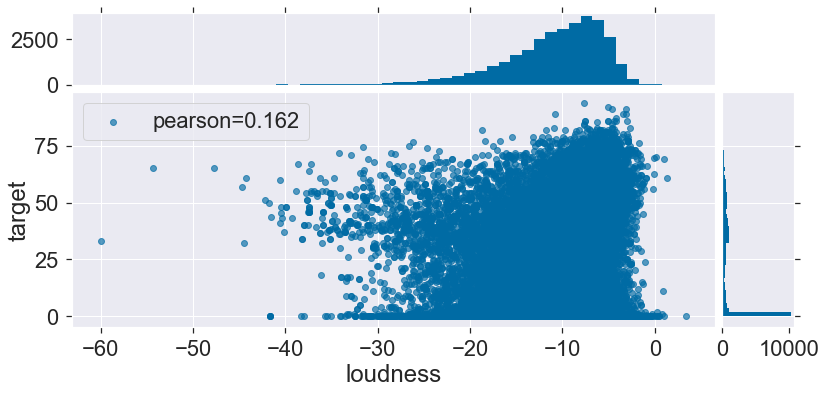

<AxesSubplot:xlabel='loudness', ylabel='target'>

In [31]:
# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns="loudness")

plt.rcParams['figure.figsize'] = (12,6)
visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show() 

liveness by artist ... 

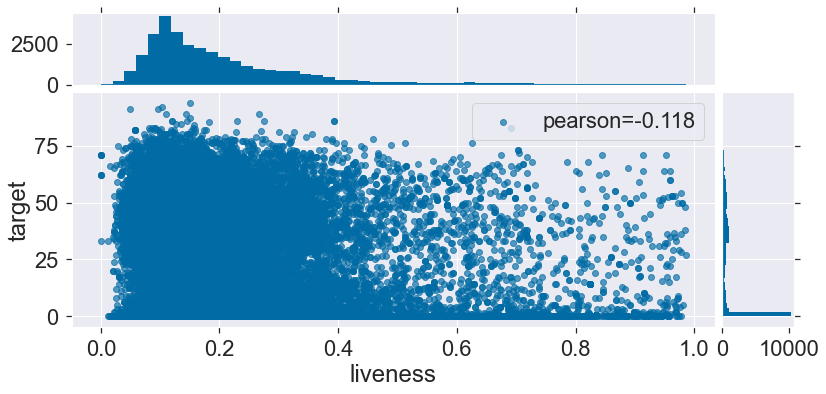

<AxesSubplot:xlabel='liveness', ylabel='target'>

In [32]:
visualizer = JointPlotVisualizer(columns="liveness")

plt.rcParams['figure.figsize'] = (12,6)
visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()

lets check with the target ....... "**popularity**"

> * **"popularity VS "loudness" by "years" and with size "key"** 
> * **"popularity VS "liveness" by "years" and with size "key"**

[Text(0.5, 1.0, '...loudness...')]

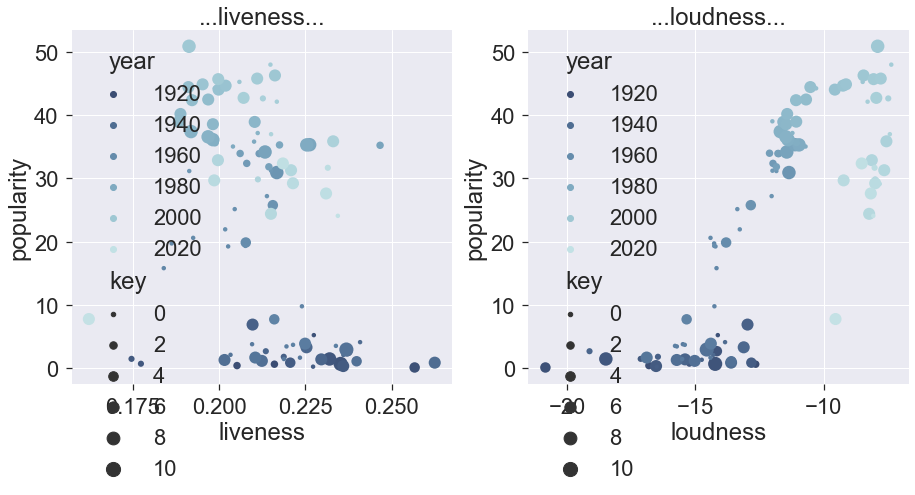

In [33]:
f, ax = plt.subplots(1,2,figsize=(15, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="liveness", y="popularity",
                hue="year", size="key",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=data_yr, ax=ax[0]).set(title='...liveness...')
sns.scatterplot(x="loudness", y="popularity",
                hue="year", size="key",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=data_yr, ax=ax[1]).set(title='...loudness...')

> * **"popularity VS "danceability" by "years" and with size "key"** 
> * **"popularity VS "tempo" by "years" and with size "key"**

[Text(0.5, 1.0, '...tempo...')]

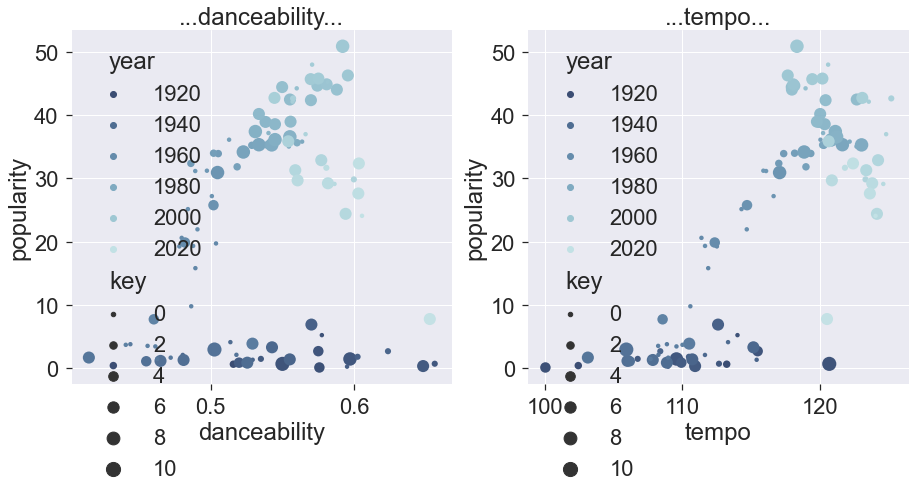

In [34]:
f, ax = plt.subplots(1,2,figsize=(15, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="danceability", y="popularity",
                hue="year", size="key",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=data_yr, ax=ax[0]).set(title='...danceability...')
sns.scatterplot(x="tempo", y="popularity",
                hue="year", size="key",
                palette="ch:r=-.2,d=.3_r",
                sizes=(20, 200), linewidth=0,
                data=data_yr, ax=ax[1]).set(title='...tempo...')

# build and deploy the model 

- ok ...!! now lets try to build and deploy the model  

i am going to use only few Audio characteristics with just 30000 records for model ..

In [35]:
use_col = ['acousticness','danceability','loudness','popularity','duration_ms','energy','speechiness','valence']

In [37]:
df_mod = pd.read_csv('data/features_all/data.csv', usecols=use_col,nrows=30000)
df_mod.to_csv('file1.csv') 
df_mod.head()

acousticness  danceability  duration_ms  energy  loudness  popularity  \
0      0.991000         0.598       168333   0.224   -12.628          12   
1      0.643000         0.852       150200   0.517    -7.261           7   
2      0.993000         0.647       163827   0.186   -12.098           4   
3      0.000173         0.730       422087   0.798    -7.311          17   
4      0.295000         0.704       165224   0.707    -6.036           2   

   speechiness  valence  
0       0.0936   0.6340  
1       0.0534   0.9500  
2       0.1740   0.6890  
3       0.0425   0.0422  
4       0.0768   0.2990

<AxesSubplot:>

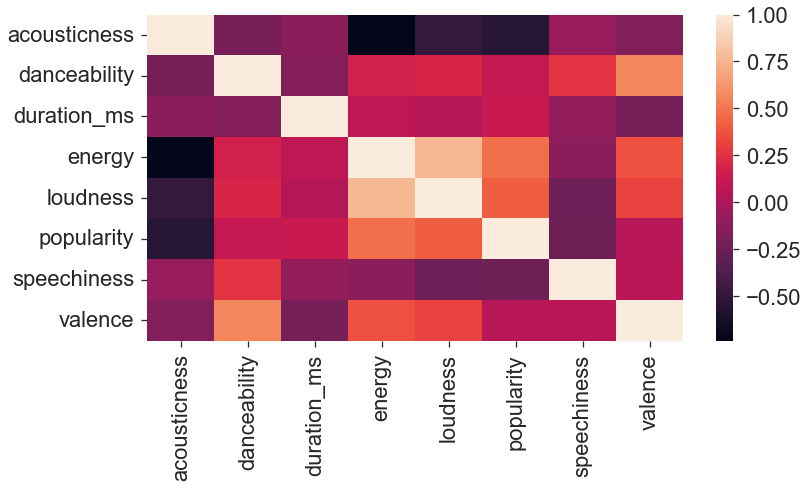

In [38]:
cor = df_mod.corr()
sns.heatmap(cor)

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X = df_mod.drop(columns=['popularity'])
y = df_mod['popularity']

In [40]:
x_train,x_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [41]:
print("num of  train sample in train set:",x_train.shape)
print("Number of samples in validation set:",y_test.shape)

num of  train sample in train set: (24000, 7)
Number of samples in validation set: (6000,)


i am not going to concentrate more on modelling(i hope all of us are good at making modelling) but more on deploying the modle as a wed app

i feel 


## "No machine learning model is valuable, untill & unless it’s deployed to production."


In [42]:
model = RandomForestRegressor()
n_estim = range(500,1000,100)
param_grid = {"n_estimators":n_estim}
model_rf = GridSearchCV(model, param_grid=param_grid,cv=5, scoring='r2',n_jobs=4, verbose=1)

model_rf.fit(x_train, y_train)
print(model_rf.best_score_)
model_rf.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=500)

random_forest.fit(x_train, y_train)
Y_pred_rf = random_forest.predict(x_test)
random_forest.score(x_train,y_train)
acc_random_forest = round(random_forest.score(x_train,y_train) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

to deploy as model we need to save the model and use that for making predicts.... so lets save the model using .pkl 

In [ ]:
mymodle = open('fordeploy.pkl', 'wb')

In [ ]:
import pickle 

pickle.dump(random_forest,mymodle,protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
mymodle.close()

In [ ]:
import numpy as np 
import pickle

mymodel = open('fordeploy.pkl', 'rb')

model = pickle.load(mymodel)

data = np.array([0.995,0.708,158648,0.1950,	-12.428,0.0506,0.7790])
data = data.reshape(1,-1)

pre = model.predict(data)
print(pre)